In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df.shape

(421570, 5)

In [5]:
df_new=df[df.Store==1]

In [6]:
df_new.shape

(10244, 5)

In [7]:
df_new=df_new[['Date','Weekly_Sales']]

In [8]:
df_new.set_index('Date',inplace=True)

In [9]:
df_new.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


In [10]:
df_imp=df

In [11]:
df_imp= df[(df_imp.Dept==1) & (df_imp.Store==1)]

In [12]:
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

tss = df_imp
tss["Date"] = pd.to_datetime(tss["Date"])
tss.index = tss["Date"]
tss = tss[["Weekly_Sales"]]
print(tss.shape)
print(tss.head())
x_train = tss.iloc[:7000,:]
x_test = tss.iloc[7001:,:]
print(x_train.shape, x_test.shape)

(143, 1)
            Weekly_Sales
Date                    
2010-02-05      24924.50
2010-02-12      46039.49
2010-02-19      41595.55
2010-02-26      19403.54
2010-03-05      21827.90
(143, 1) (0, 1)


/home/pa1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


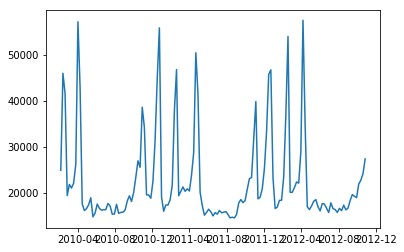

In [13]:
plt.plot(df_imp.index,df_imp['Weekly_Sales'])

In [14]:
df_imp=df_imp[['Date','Weekly_Sales']]

In [15]:
df_imp.set_index('Date')

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
2010-03-12,21043.39
2010-03-19,22136.64
2010-03-26,26229.21
2010-04-02,57258.43


In [16]:
X_train=df_imp.iloc[:110,0:2]

In [17]:
X_test=df_imp.iloc[110:,0:2]

In [18]:
y_train=df_imp.iloc[:110,1]

In [19]:
y_test=df_imp.iloc[110:,1]

In [20]:
data=df_imp

In [21]:
df_imp.iloc[1:10,1]

Date
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
2010-03-12    21043.39
2010-03-19    22136.64
2010-03-26    26229.21
2010-04-02    57258.43
2010-04-09    42960.91
Name: Weekly_Sales, dtype: float64

Test Statistic                    -3.761327
p-value                            0.003329
#Lags Used                        38.000000
Number of Observations Used    10205.000000
Critical Value (1%)               -3.430991
Critical Value (5%)               -2.861823
Critical Value (10%)              -2.566921
dtype: float64


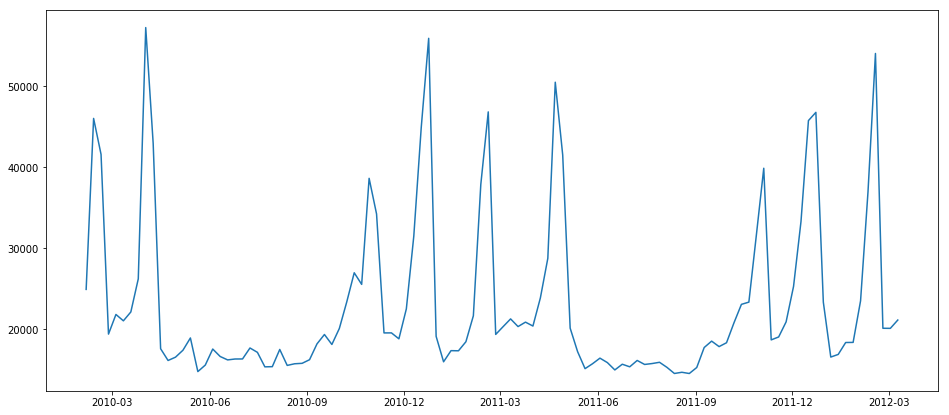

In [22]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(data):
    dftest = adfuller(df_new['Weekly_Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index,data.Weekly_Sales )
    plt.show()

stationarity_test(X_train)

/home/pa1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


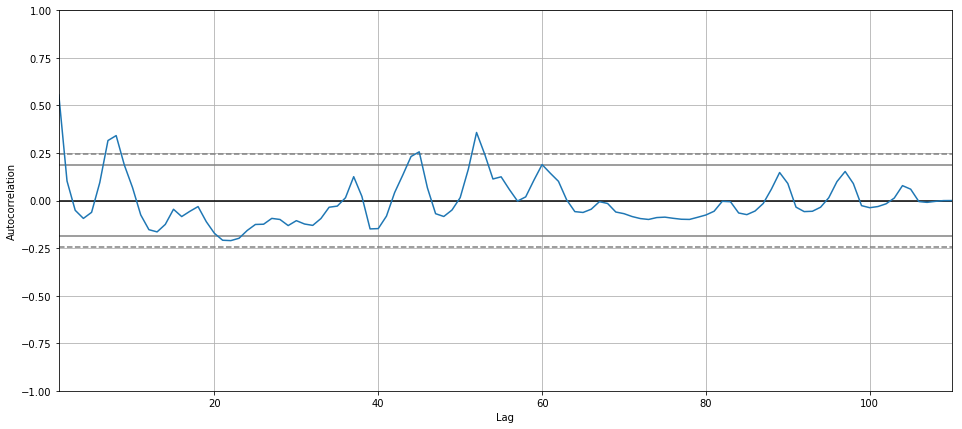

In [30]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(X_train["Weekly_Sales"])

Test Statistic                    -3.761327
p-value                            0.003329
#Lags Used                        38.000000
Number of Observations Used    10205.000000
Critical Value (1%)               -3.430991
Critical Value (5%)               -2.861823
Critical Value (10%)              -2.566921
dtype: float64


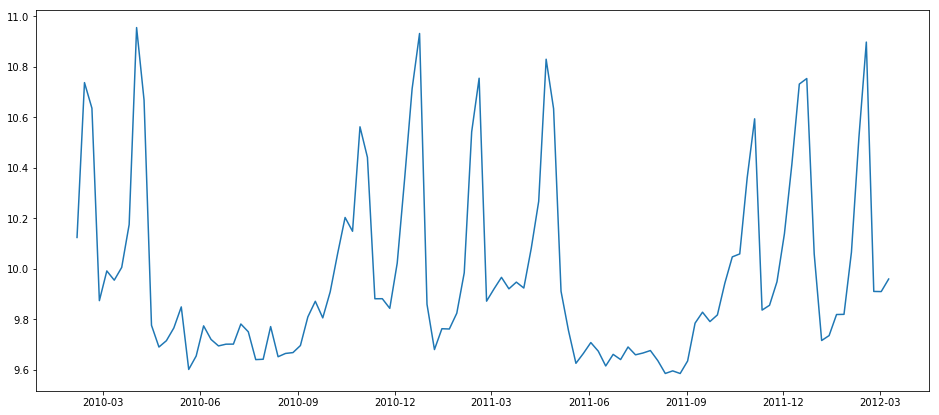

In [38]:
log_train = X_train
log_train = log_train["Weekly_Sales"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

Test Statistic                    -3.761327
p-value                            0.003329
#Lags Used                        38.000000
Number of Observations Used    10205.000000
Critical Value (1%)               -3.430991
Critical Value (5%)               -2.861823
Critical Value (10%)              -2.566921
dtype: float64


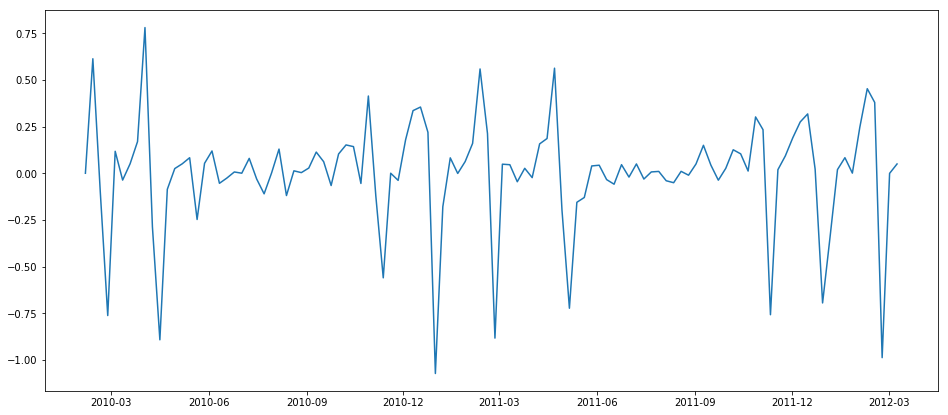

In [40]:
first_diff = log_train["Weekly_Sales"] - log_train["Weekly_Sales"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

Test Statistic                    -3.761327
p-value                            0.003329
#Lags Used                        38.000000
Number of Observations Used    10205.000000
Critical Value (1%)               -3.430991
Critical Value (5%)               -2.861823
Critical Value (10%)              -2.566921
dtype: float64


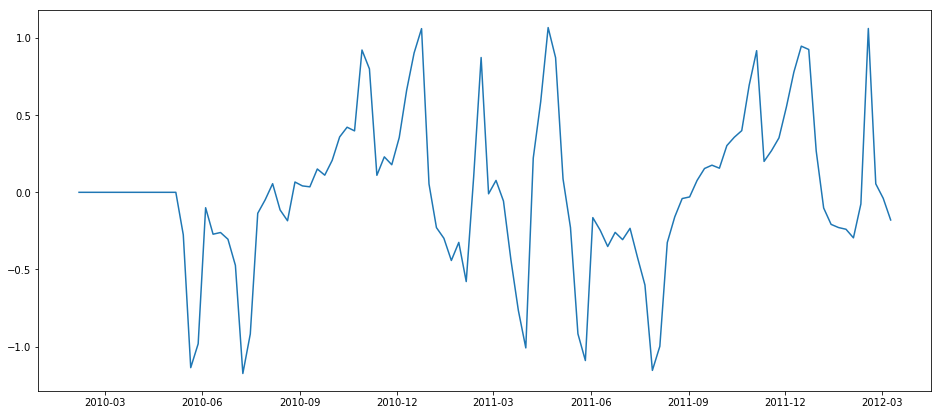

In [41]:
seasonal_data_differenced = log_train["Weekly_Sales"] - log_train["Weekly_Sales"].shift(14)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

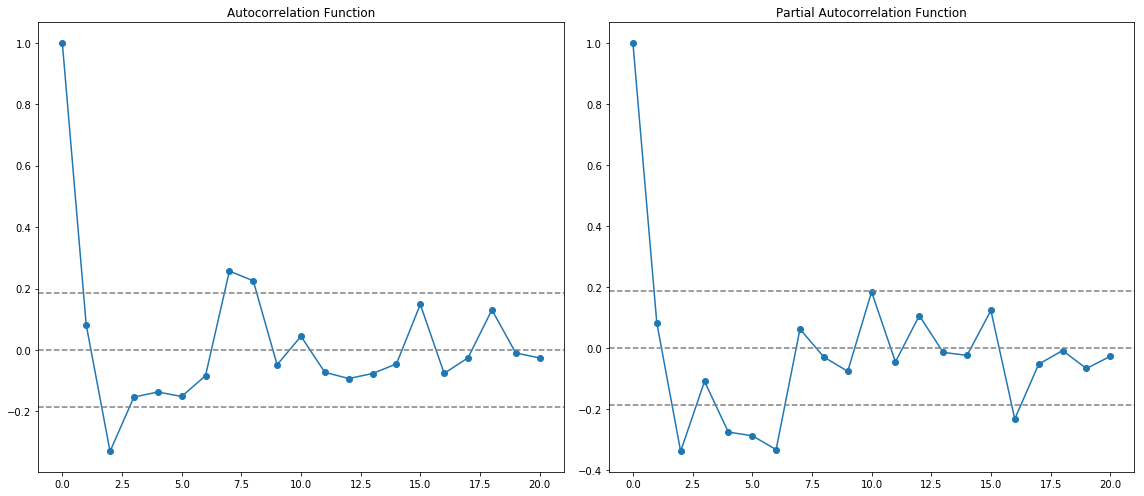

In [42]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [43]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1) 

/home/pa1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/home/pa1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/home/pa1/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/pa1/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`

In [44]:
x_train=X_train
x_test=X_test

7769.52837322949


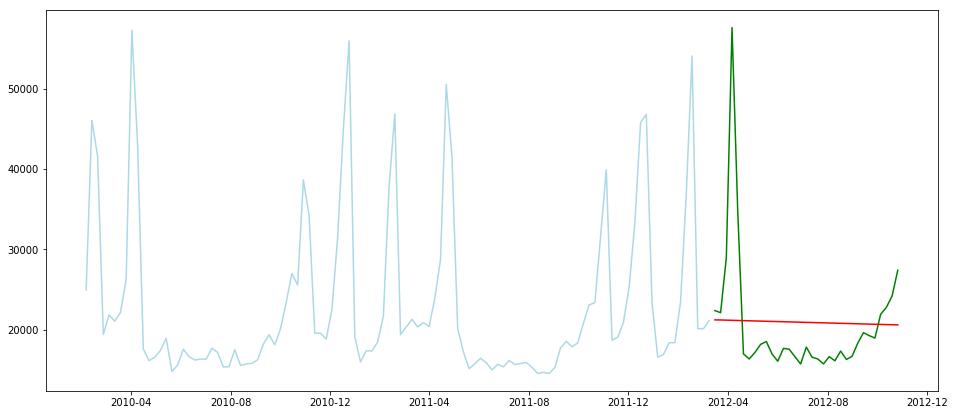

In [50]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Weekly_Sales, color="lightblue")
plt.plot(x_test.index, x_test.Weekly_Sales, color="green")

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Weekly_Sales, pred.yhat), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

In [62]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(log_train, trend='n', order=(0,0,1), seasonal_order=(0,1,1,14))
results = mod.fit(disp=-1)
print(results.summary())

/home/pa1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                       Weekly_Sales   No. Observations:                  110
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 14)   Log Likelihood                 -24.633
Date:                            Mon, 21 Jan 2019   AIC                             55.266
Time:                                    12:42:57   BIC                             62.960
Sample:                                02-05-2010   HQIC                            58.376
                                     - 03-09-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7830      0.074     10.603      0.000       0.638       0.928
ma.S.L14      -0.9940      5.082   

/home/pa1/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


8466.871387627221


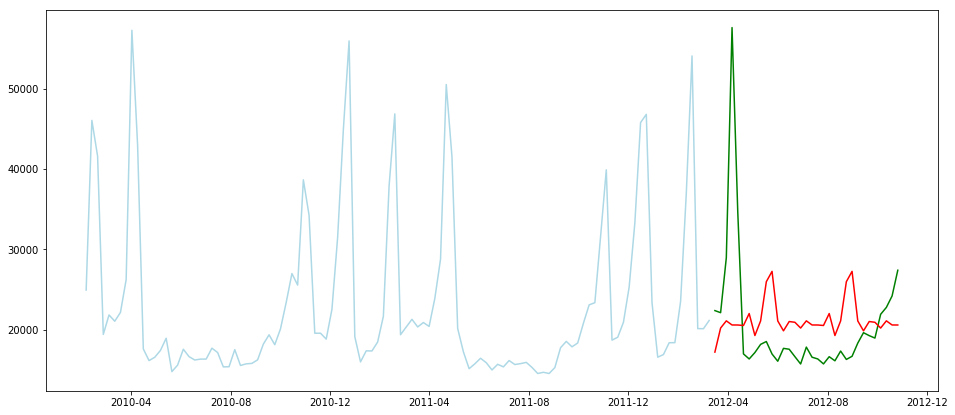

In [63]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Weekly_Sales, color="lightblue")
plt.plot(x_test.index, x_test.Weekly_Sales, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Weekly_Sales, pred.yhat), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()